### 결정 트리의 앙상블
* 앙상블: 여러 머신러닝 모델을 연결하여 더 강력한 모델 만드는 기법.
    * 랜덤 포레스트 (random forest)
    * 그레이디언트 부스팅 (gradient boosting)

* 랜덤 포레스트
    * 기본적으로 조금씩 다른 여러 결정 트리의 묶음.
        * 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택
        * 분할 테스트에서 특성을 무작위로 선택하는 방법

* 랜덤 포레스트 구축
    * n_estimators: 생성할 트리의 개수
    * 데이터의 부트스트랩 샘플 (bootstrap sample) 생성.
        * 중복 추출 가능
    * 트리마다 알고리즘이 각 노드에서 후보 특성을 무작위로 선택. (max_features)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=42
)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

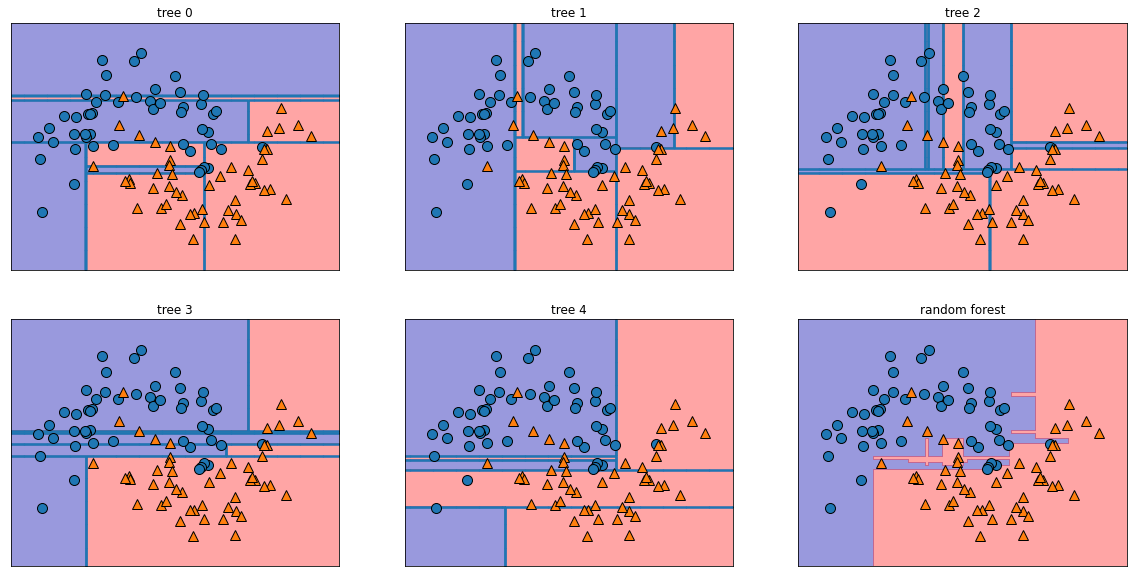

In [2]:
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0
)
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(forest.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(forest.score(X_test, y_test)))

train set acc: 1.000
test set acc: 0.972


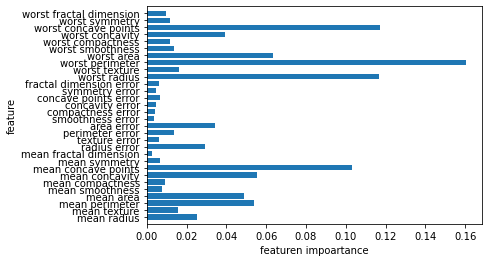

In [4]:
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('featuren impoartance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

* 장단점과 매개변수
    * 성능 매우 뛰어나고, 매개변수 튜닝 많이 하지 않아도 잘 작동, 데이터의 스케일 맞출 필요 없다.
    * 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다.
    * 매우 큰 데이터셋에도 잘 작동, 훈련은 여러 CPU 코어라 간단하게 병렬화할 수 있다.
    * 선형 모델보다 많은 메모리를 사횽, 훈련과 예측이 느리다.

* 그레이디언트 부스팅 회귀 트리
    * 이전 트리의 오차를 보완하는 방식.
    * 보통 하나에서 다섯 정도의 깊지 않는 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다.
    * 이런 얕은 트리 같은 간단한 모델(약한 학습기 weak learner)을 많이 연결하는 것.
    * 트리가 많이 추가될수록 성능이 좋아짐.
    * 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감.
    * learning_rate
        * 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다.
    * n_estimators
        * 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아진다.

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(gbrt.score(X_test, y_test)))

train set acc: 1.000
test set acc: 0.965


In [6]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(gbrt.score(X_test, y_test)))

train set acc: 0.991
test set acc: 0.972


In [7]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('train set acc: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test set acc: {:.3f}'.format(gbrt.score(X_test, y_test)))

train set acc: 0.988
test set acc: 0.965


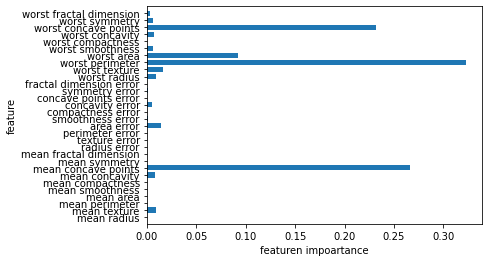

In [8]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

* 대규모 머신러닝 문제에 그레이디언트 부스팅을 적용하려면 xgboost 패키지와 파이썬 인터페이스를 검토해보는 것이 좋다.
* https://xgboost.readthedocs.io
* LightGBM (https://lightgbm.readthedocs.io)

* 장단점과 매개변수
    * 매개변수를 잘 조정해야 하고, 훈련 시간이 길다.
    * 특성의 스케일을 조정하지 않아도 되고, 이진 특성이나 연속적인 특성에서도 잘 동작.
    * 중요 매개변수
        * n_estimators
        * learning_rate
        * learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 한다.
        * n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아진다.
        * 일반적으로 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것.
        * max_depth - 보통 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 한다.

### 그 외 다른 앙상블

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42
)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

* 배깅 (Bagging)
    * Bootstrap aggregating
    * 중복 허용한 랜덤 샘플링으로 만든 훈련 세트 사용해 분류기 각기 다르게 학습.
    * oob_score (out of bag): 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(
    LogisticRegression(solver='liblinear'),
    n_estimators=100,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
print('train set acc: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('test set acc: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB sample acc: {:.3f}'.format(bagging.oob_score_))

train set acc: 0.962
test set acc: 0.958
OOB sample acc: 0.948


In [12]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=5,
    n_jobs=-1,
    random_state=42
)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

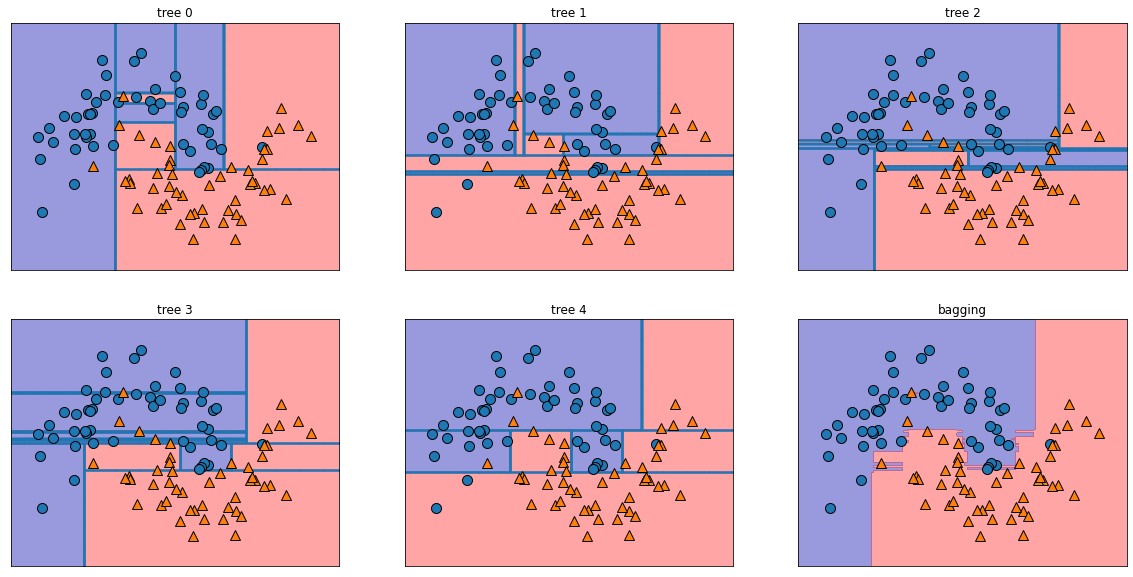

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('bagging')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [14]:
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=100,
    oob_score=True,
    n_jobs=-1, 
    random_state=42
)
bagging.fit(Xc_train, yc_train)

print('train set acc: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('test set acc: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('oob sample acc: {:.3f}'.format(bagging.oob_score_))

train set acc: 1.000
test set acc: 0.965
oob sample acc: 0.948


* 엑스트라 트리
    * 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾는다.
    * DecisionTreeClassifier(splitter='random') 을 사용.
    * 부트스트랩 샘플링은 기본적으로 적용하지 않음.
    * 무작위성을 증가시키면 일반적으로 모델의 편향이 늘어나지만 분산이 감소.

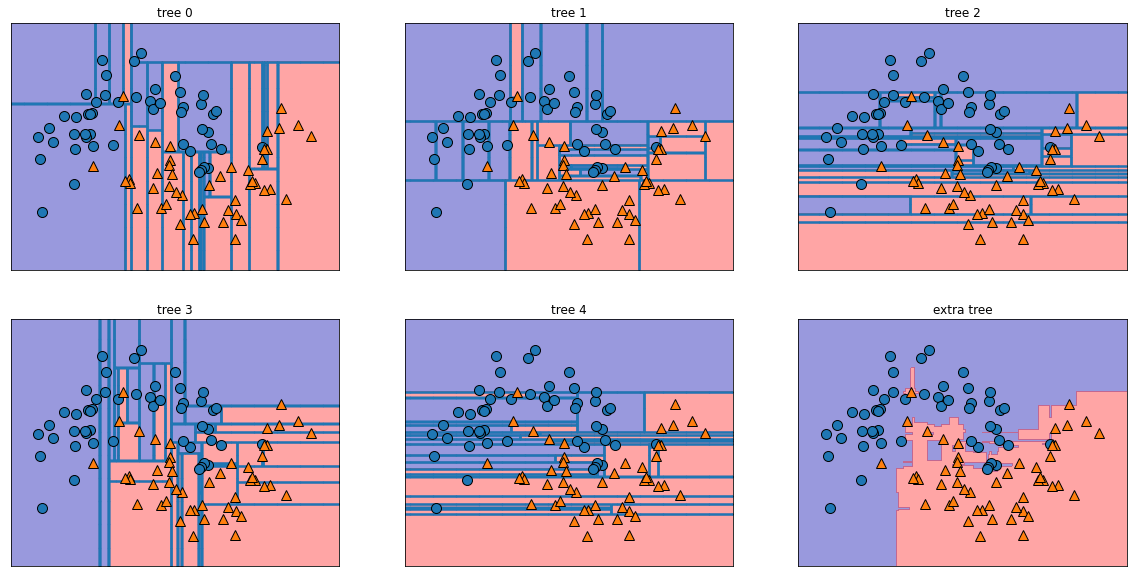

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('extra tree')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [16]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('train set acc: {:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('test set acc: {:.3f}'.format(xtree.score(Xc_test, yc_test)))

train set acc: 1.000
test set acc: 0.972


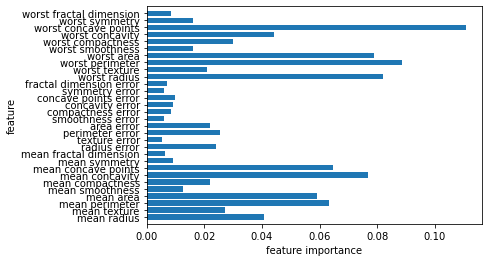

In [17]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

* 에이다부스트 (AdaBoost)
    * Adaptive Boosting
    * 그레이디언트 부스팅처럼 약한 학습기 사용.
    * 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴.

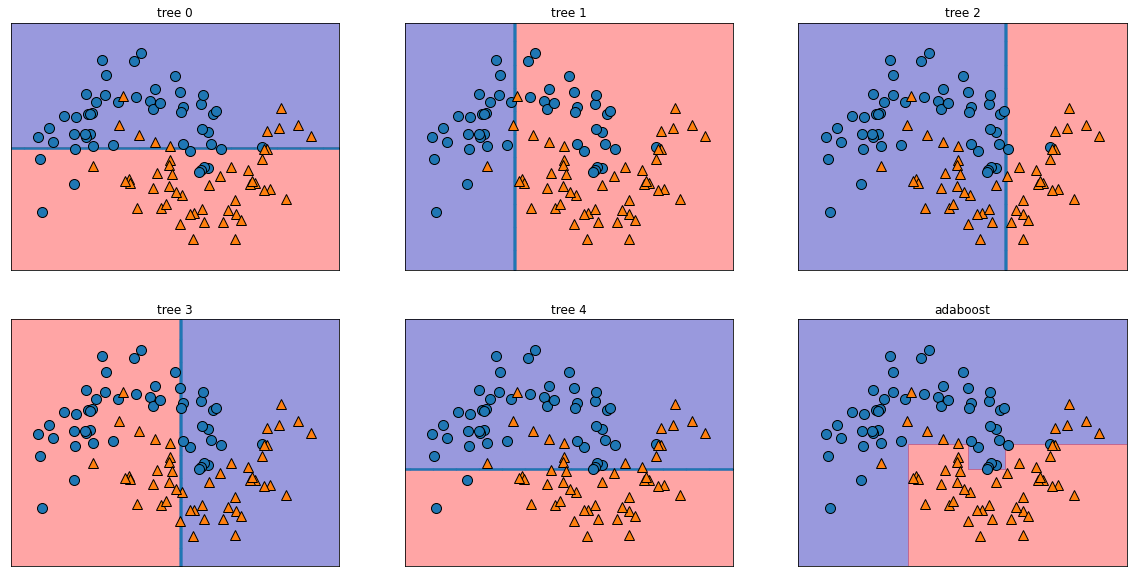

In [18]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('adaboost')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [19]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print('train set acc: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('test set acc: {:.3f}'.format(ada.score(Xc_test, yc_test)))

train set acc: 1.000
test set acc: 0.986


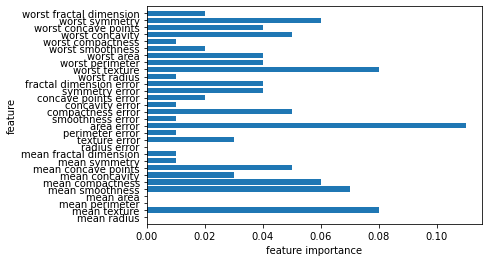

In [20]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

* 히스토그램 기반 부스팅
    * 입력 특성을 256개의 구간으로 나누기 때문에 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있다.
    * 256개 구간 중 하나를 누락된 값을 위해서 사용하기 때문에 누락된 값을 위해 전처리할 필요가 없다.
    * 일반적으로 샘플 개수가 1만 개보다 많은 경우 그레이디언트 부스팅보다 히스토그램 기반 부스팅이 훨씬 빠르다.
    * max_iter

### 커널 서포트 벡터 머신
    * kernelized support vector machines

* 선형 모델과 비선형 특성
    * 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제급하는 식으로 새로운 특성을 추가.

Text(0, 0.5, 'feature 1')

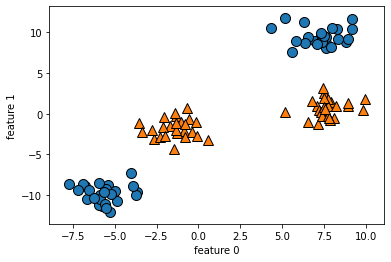

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

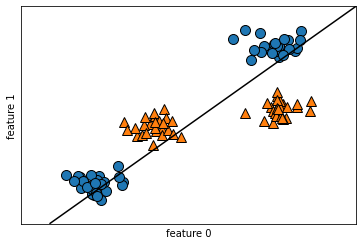

In [22]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5, 0, 'feature1 ** 2')

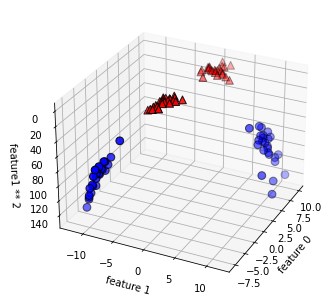

In [25]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 ** 2')

Text(0.5, 0, 'feature1 ** 2')

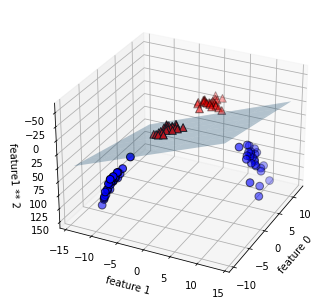

In [29]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / (-coef[2])
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 ** 2')

Text(0, 0.5, 'feature 1')

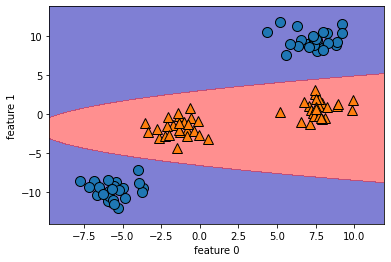

In [30]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')